# Concrete Compressive Strength

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [7]:
ds=pd.read_csv('Concrete_Data.csv')

In [8]:
data=pd.DataFrame(data=ds)
data

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
data.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [10]:
data.shape

(1030, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Observation:**
* No missing data is there in the dataset
* 9 columns are there in the dataset
* Dataset consists of 8 float datatype and 1 integer datatype in the dataset

In [13]:
data.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

## Statistical Summary

In [14]:
data.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Observations:**
* High Standard Deviation are present in the dataset
* Huge gap between 75 percentile and max, hence outliers are present.

<AxesSubplot:>

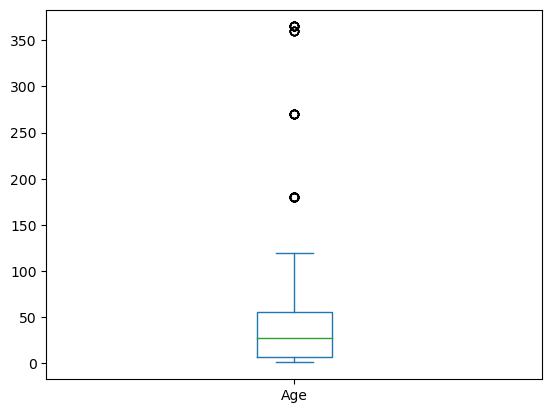

In [15]:
data['Age'].plot.box()

Cement                 AxesSubplot(0.125,0.53;0.133621x0.35)
Blast               AxesSubplot(0.285345,0.53;0.133621x0.35)
Fly Ash              AxesSubplot(0.44569,0.53;0.133621x0.35)
Water               AxesSubplot(0.606034,0.53;0.133621x0.35)
Superplasticizer    AxesSubplot(0.766379,0.53;0.133621x0.35)
CA                     AxesSubplot(0.125,0.11;0.133621x0.35)
FA                  AxesSubplot(0.285345,0.11;0.133621x0.35)
Age                  AxesSubplot(0.44569,0.11;0.133621x0.35)
CMS                 AxesSubplot(0.606034,0.11;0.133621x0.35)
dtype: object

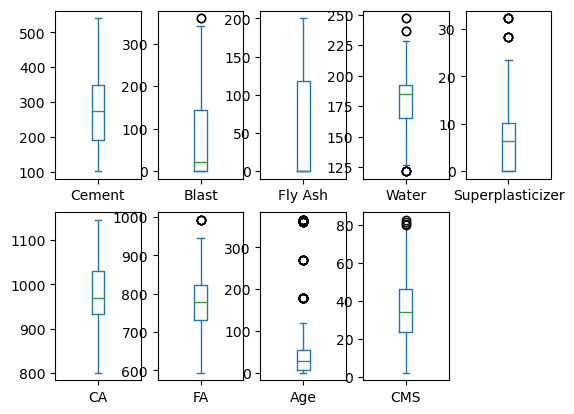

In [16]:
data.plot(kind='box',subplots=True, layout=(2,5))

<AxesSubplot:>

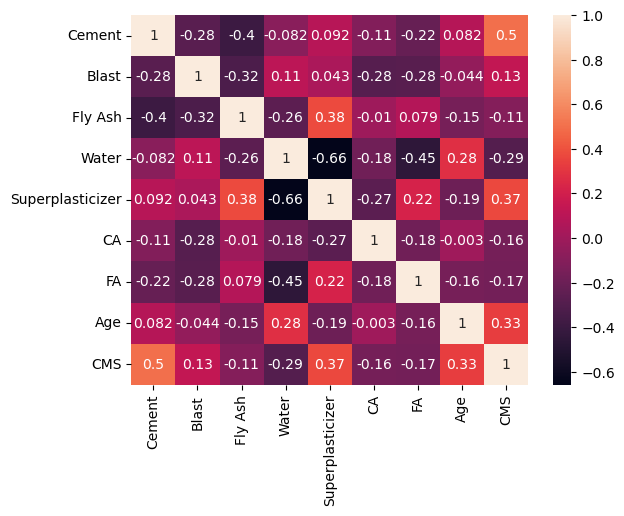

In [18]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:ylabel='Frequency'>

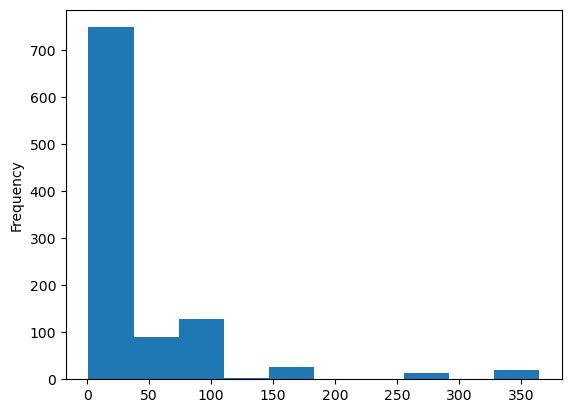

In [19]:
data['Age'].plot.hist()

In [20]:
data['Age']=np.log(data['Age'])

<AxesSubplot:ylabel='Frequency'>

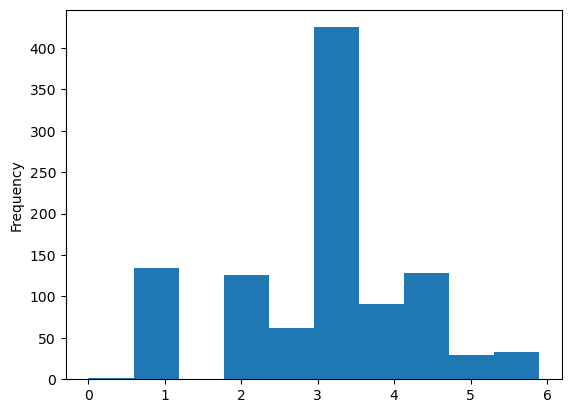

In [21]:
data['Age'].plot.hist()

<AxesSubplot:xlabel='Age', ylabel='Density'>

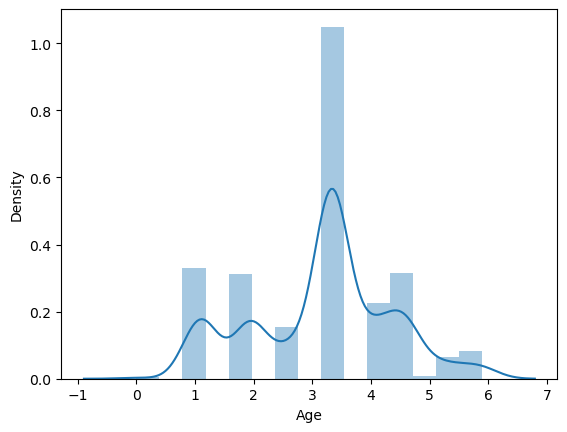

In [23]:
sns.distplot(data['Age'])

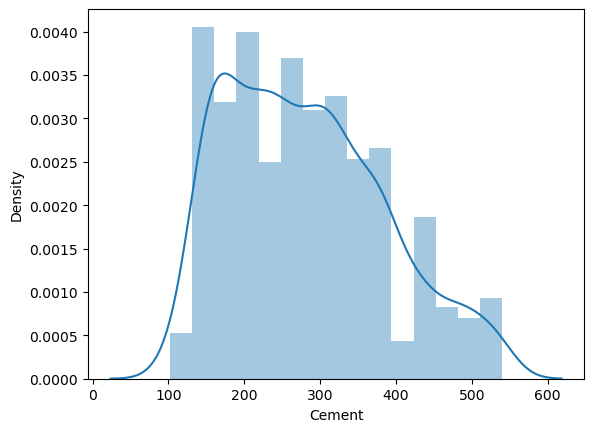

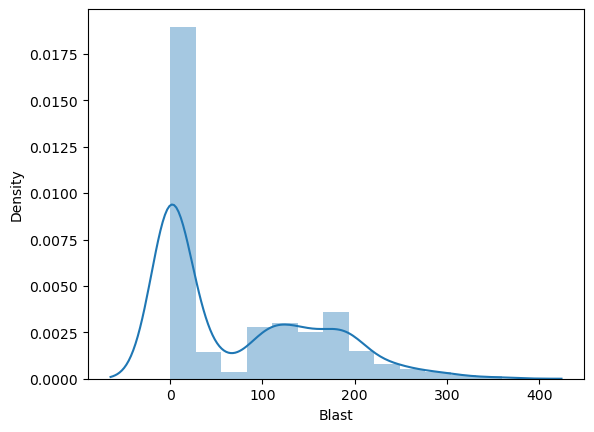

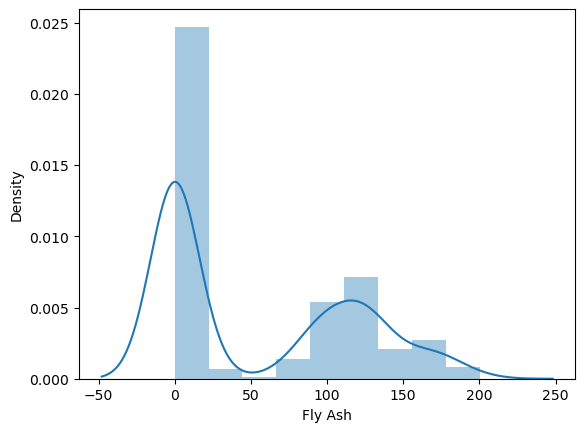

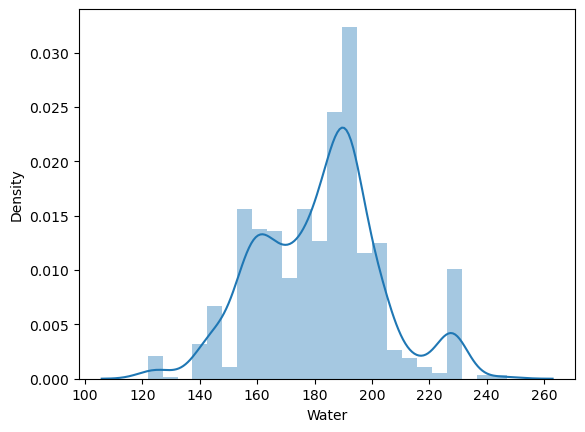

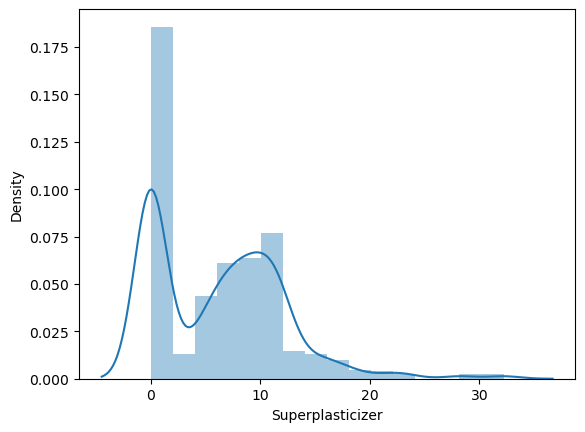

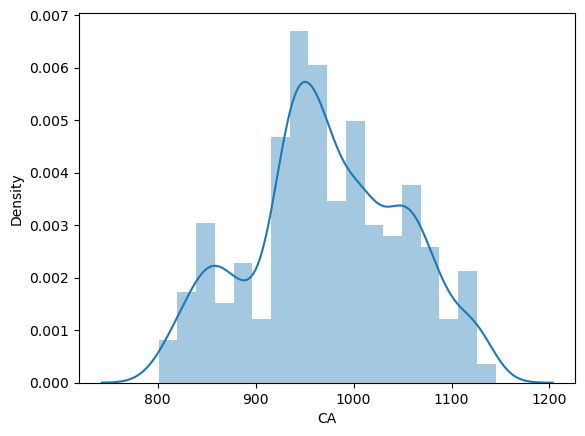

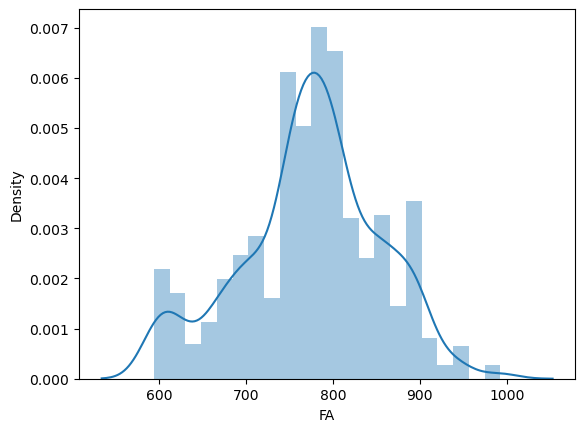

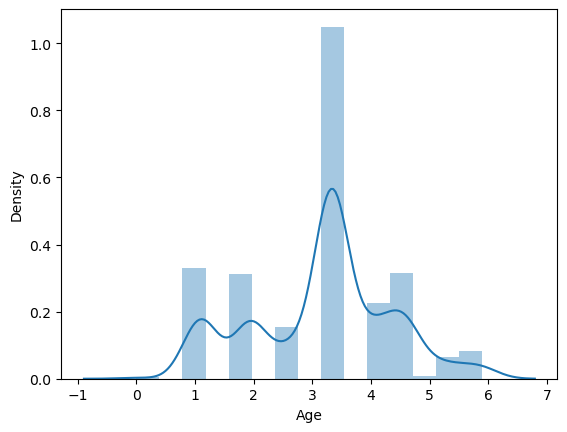

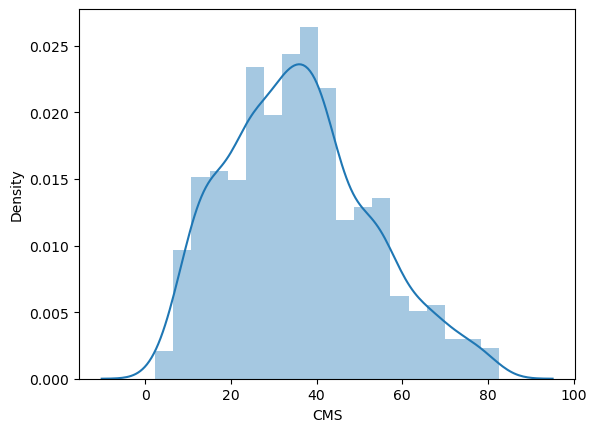

In [24]:
for i in data.columns:
    plt.figure()
    sns.distplot(data[i])

In [26]:
y=data.iloc[:,-1]

y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: CMS, dtype: float64

In [27]:
y.shape

(1030,)

In [28]:
x=data.iloc[:,0:8]

x.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5.598422
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5.899897
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5.886104


In [29]:
x.shape

(1030, 8)

In [30]:
y.shape

(1030,)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22, random_state=42)

In [33]:
x_train.shape

(803, 8)

In [34]:
x_test.shape

(227, 8)

In [35]:
y_train.shape

(803,)

In [36]:
y_test.shape

(227,)

In [37]:
lm=LinearRegression()

In [38]:
lm.fit(x_train,y_train)

LinearRegression()

In [39]:
lm.score(x_train,y_train)

0.8155123615631037

In [40]:
lm.coef_

array([ 0.1327493 ,  0.11589363,  0.08930205, -0.1152292 ,  0.15129995,
        0.02998802,  0.03699063,  8.71214574])

In [41]:
lm.intercept_

-80.4428215259439

In [42]:
pred=lm.predict(x_test)

In [43]:
print("Predicted value and actual values: ",pred,y_test)

Predicted value and actual values:  [45.94143103 45.59000943 65.05453834 38.20822699 18.61063008 41.95125461
 28.48118192 50.51889007 32.51634641 46.07321515 31.23228031 13.31884893
 50.60729564 45.3149854  28.40089773 38.63155258 31.84561192 20.59750655
 33.74635391 29.96984838 41.26710687 39.01176804 44.4265411  11.69449923
 31.01240222 36.70446097  9.71219923 43.17708004 46.85076984  9.34839437
 41.48125751 35.90086883 49.90239813 51.13233625 16.64107129 32.89082651
 32.36993845 40.64834791 14.07403367 44.41218346 16.77752079  2.72800172
 38.22054077 54.13252387  7.32465049 63.89230054 52.14916009 48.53753806
 24.71626651  5.83607665 43.79018741 43.0363338  30.5407319  27.65732794
 52.70641392 38.39412033 26.47754716 10.96299691 35.27900934 23.05539963
 40.49782775  7.82119948 37.87429393 48.4148116  26.59062026 22.3745696
 34.42189872 18.70824839 31.92557897 24.60173206  5.87176008 22.11685523
  0.98270563 31.17933432 30.32905573  7.34972174 46.5819465  49.79104578
 61.73952541 18.

In [44]:
lm.score(x_test,y_test)

0.8267856435992097

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(pred,y_test))

46.862802661117996


In [48]:
def predicttest(test):
    test=test.reshape(1,-1)
    t=lm.predict(test)
    print(t)

In [49]:
test=np.array([332.5,142.5,0.0,228.0,0.0,932.0,594.0,5.899897])

predicttest(test)

[55.26093768]
